<a href="https://colab.research.google.com/github/Shujah-Butt/Freelancing-Projects/blob/main/Task_3_Forest_Cover_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Forest Cover Type Classification

**Objective:** Predict the forest cover type using cartographic and environmental features.

**Dataset:** [Forest CoverType - UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/covertype)

**Access Method:** Fetched programmatically using `ucimlrepo` library.

**Tools:** Python, Pandas, Scikit-learn, XGBoost, Matplotlib


In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from ucimlrepo import fetch_ucirepo

In [4]:
# Step 2: Fetch dataset from UCI repository
covertype = fetch_ucirepo(id=31)
X = covertype.data.features
y = covertype.data.targets
print(X.shape)
print(y.value_counts())

(581012, 54)
Cover_Type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
Name: count, dtype: int64


In [5]:
# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.97      0.96      7121
           4       0.92      0.85      0.89       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



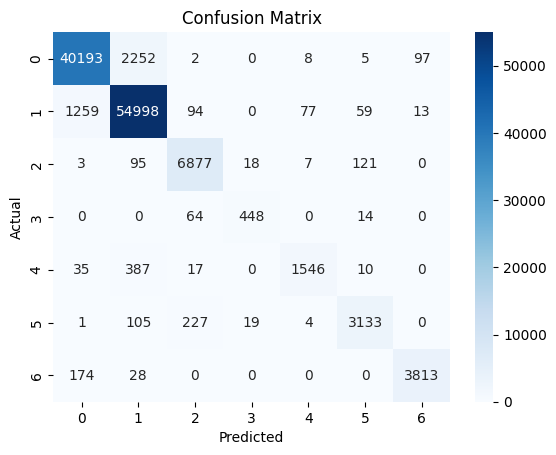

In [8]:
# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

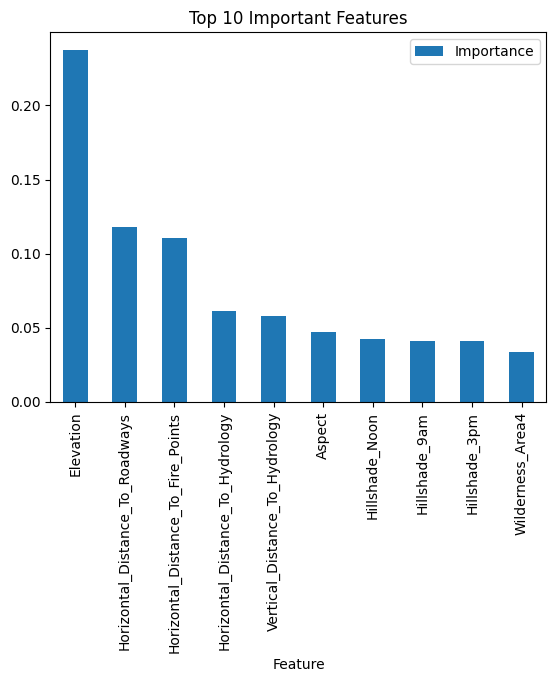

In [9]:
# Step 6: Feature Importance
importances = rf.feature_importances_
feat_names = X.columns
imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
imp_df.sort_values(by='Importance', ascending=False).head(10).plot(kind='bar', x='Feature', y='Importance')
plt.title('Top 10 Important Features')
plt.show()